In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib
from matplotlib import pyplot as plt

sys.path.append("../modules")
from DS_models_stat import cut_cat, make_histogram, simple_recall, calc_corr_b
from DS_data_transformation import inter_cats
from tqdm.notebook import tqdm
%config InlineBackend.figure_format = 'retina'

In [5]:
matplotlib.rcParams["font.size"] = 15

In [3]:
def hist_prm(df, prm, bins):
    hist, bins = np.histogram(df[prm], bins)
    return hist

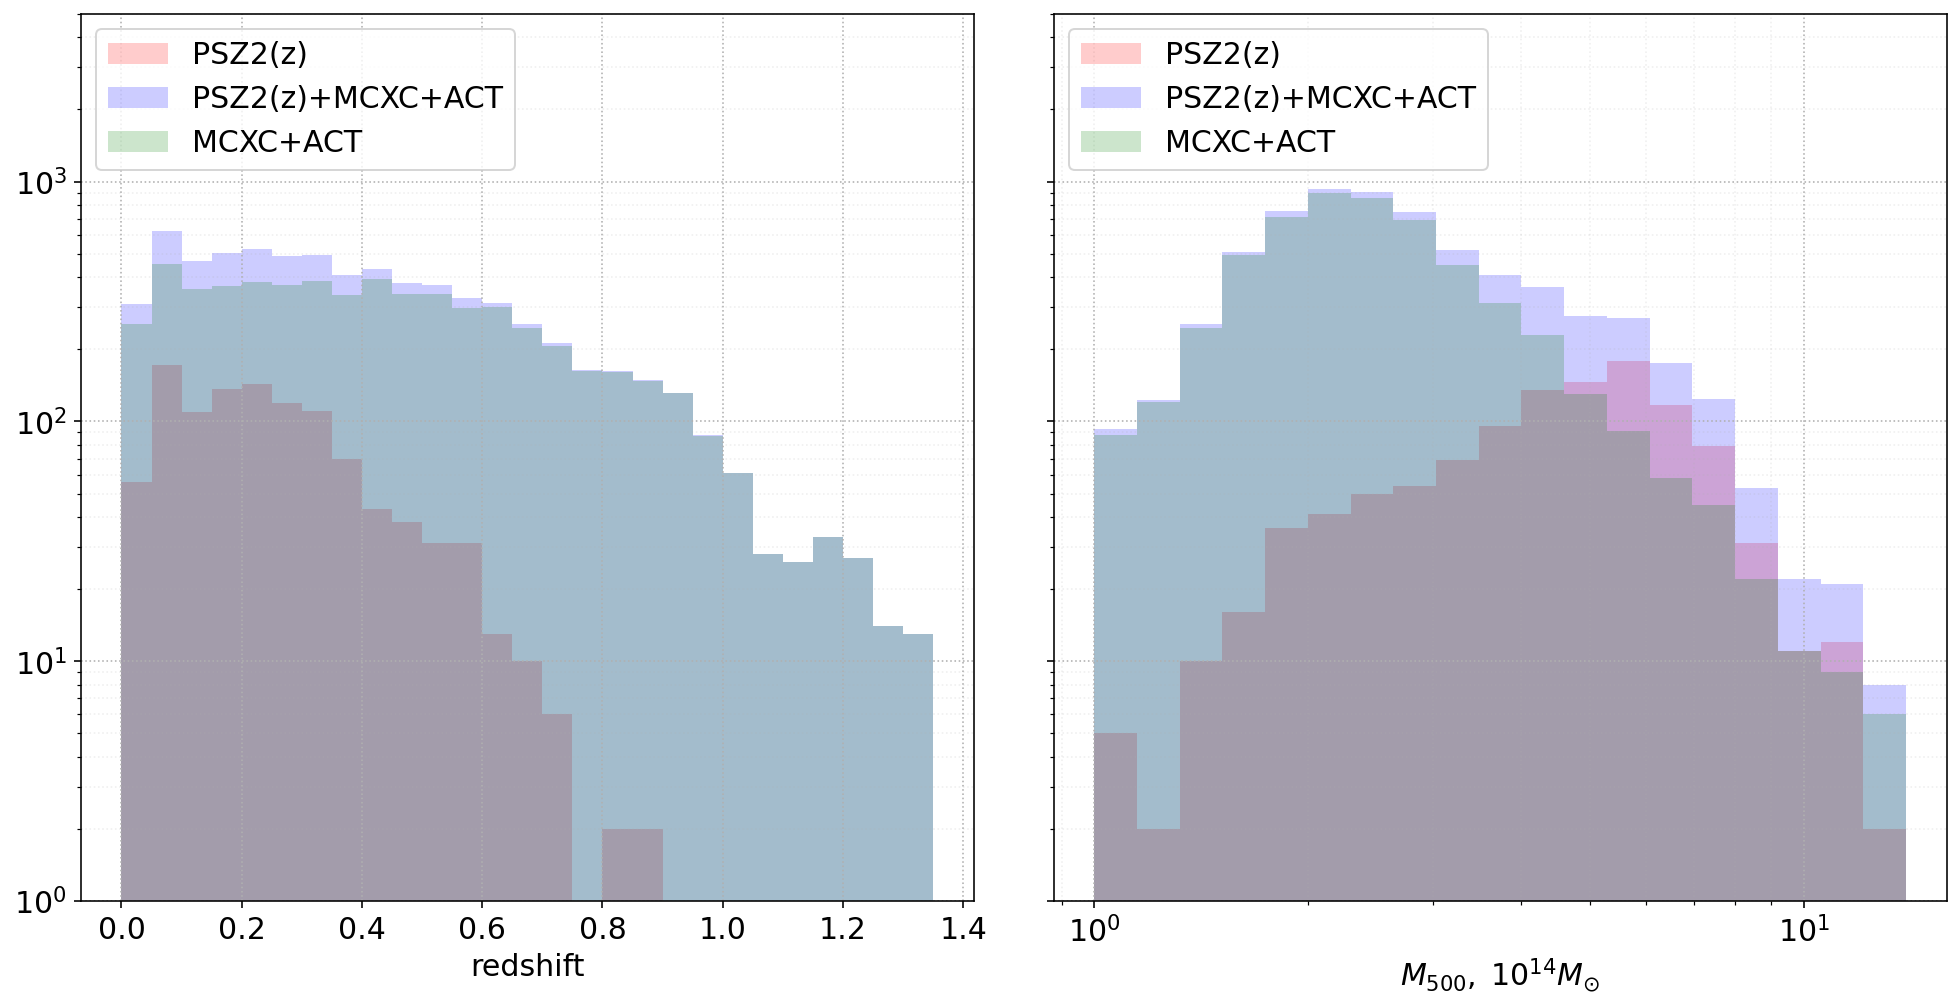

In [8]:
def make_m_z_hist(df_inter=None, add_text='', ylim=[1, 1000 * 5]):
    
    filedict = {"PSZ2(z)" : '../Data/cut_cats/PSZ2_z_.csv', 
               "MCXC": '../Data/original_cats/MCXC.csv',
               "ACT": '../Data/original_cats/ACT.csv'}
    
    true_cats = {'PSZ2(z)' : pd.read_csv(filedict["PSZ2(z)"]),
                 'PSZ2(z)+MCXC+ACT' : pd.concat([pd.read_csv(file) for file in filedict.values()]),
                 "MCXC+ACT" : pd.concat([pd.read_csv(filedict["MCXC"]), pd.read_csv(filedict["ACT"])])}
    
    if not (df_inter is None):
        for name in true_cats:
            true_cats[name] = inter_cats(true_cats[name], df_inter)
    
    bins_z = np.arange(0, 1.4, 0.05)
    hist_z = {}
    for name in true_cats:
        hist_z[name] = hist_prm(true_cats[name], 'z', bins_z)

    bins_m = [2 ** i for i in np.arange(0, 4, 0.2)]
    hist_m = {}
    for name in true_cats:
        hist_m[name] = hist_prm(true_cats[name], 'M500', bins_m)

    fig, ax = plt.subplots(1, 2, figsize=(7 * 2, 7), sharey=True)
    fig.tight_layout()
    histtype='bar'
    alpha=0.2
    make_histogram(ax[0], counts_list=list(hist_z.values()), bins=bins_z, label_list=[name + add_text for name in list(hist_z.keys())], 
                   log=True, histtype=histtype, alpha=alpha)
    make_histogram(ax[1], counts_list=list(hist_m.values()), bins=bins_m, label_list=[name + add_text for name in list(hist_m.keys())], 
                   log=True, histtype=histtype, alpha=alpha)
    ax[0].set_xlabel('redshift')
    ax[1].set_xlabel('$M_{500}, \;10^{14}M_{\odot}$')
    ax[1].set_xscale('log')
    ax[0].set_ylim(ylim)
    for i in range(2):
        ax[i].grid(True, axis='both', which='major', linestyle=':')
        ax[i].grid(True, axis='both', which='minor', alpha=0.2, linestyle=':')
make_m_z_hist()